In [3]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../../setigen")
import setigen as stg

/Users/bbrzycki/anaconda3/envs/breakthroughlisten27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
tsamp = 18.253611008
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fchans = 1024
tchans = 16

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

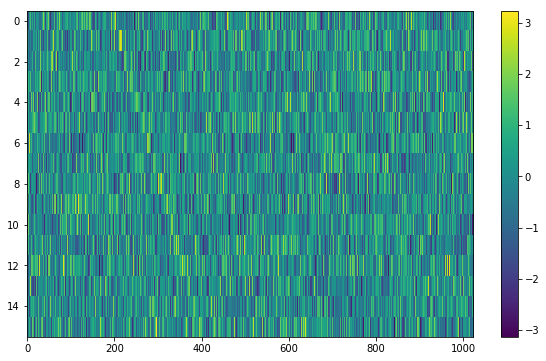

In [3]:
signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[200], drift_rate = -0.000002),
                          stg.constant_t_profile(level = 2.0),
                          stg.box_f_profile(width = 0.00001),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
plt.imshow(stg.normalize(stg.inject_noise(signal)), aspect='auto')
plt.colorbar()

(344, -7.595009137817957e-08, 2.760069588408907)


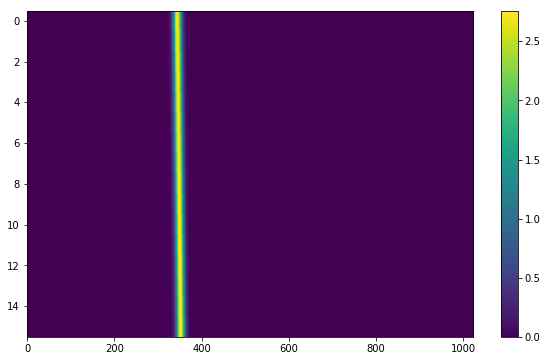

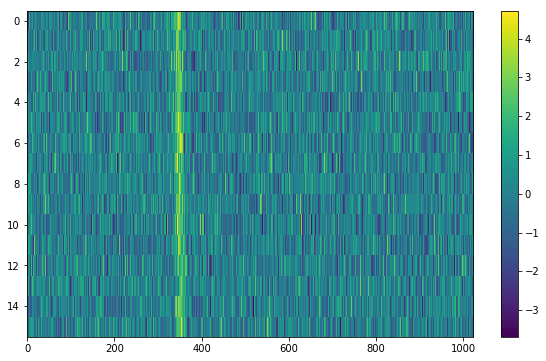

In [5]:
start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                               (fchans-1-start_index)*df/(tsamp*tchans))
#drift_rate = 0
level = np.random.uniform(1,5)

signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.constant_t_profile(level = level),
                          stg.gaussian_f_profile(width = 0.00002),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
fig = plt.figure(figsize=(10,6))
plt.imshow(stg.inject_noise(signal), aspect='auto')
# plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()
# plt.imshow(signal)

# normalized_signal = stg.normalize(stg.inject_noise(signal))
# plt.imsave('test_none.png', normalized_signal)
print(start_index, drift_rate, level)

In [7]:
import errno
set = 'set01'
labels = ['signal_nonzero', 'signal_zero', 'no_signal']
dirs = ['../data/%s/train/%s/' % (set, label) for label in labels] \
        + ['../data/%s/validation/%s/' % (set, label) for label in labels] 
for d in dirs:
    try:
        os.makedirs(d)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

In [11]:
# Generate training and validation data!
datasets = [('train', 2000), ('validation', 500)]

for name, num in datasets:
    
    for i in range(num):

        output_fn = '../data/'+set+'/%s/%s/%s_%04d.png' % (name,'signal_nonzero','signal_nonzero',i)

        start_index = np.random.randint(0,fchans)
        drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                                       (fchans-1-start_index)*df/(tsamp*tchans))
        level = np.random.uniform(2,5)

        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                  stg.constant_t_profile(level = level),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0))

#         normalized_signal = stg.normalize(stg.inject_noise(signal))
        normalized_signal = (stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal)
        print('Saved %s of %s signal nonzero data for %s' % (i, num, name))
        
    for i in range(num):

        output_fn = '../data/'+set+'/%s/%s/%s_%04d.png' % (name,'signal_zero','signal_zero',i)

        start_index = np.random.randint(0,fchans)
        drift_rate = 0
        level = np.random.uniform(2,5)

        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                  stg.constant_t_profile(level = level),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0))

        normalized_signal = (stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal)
        print('Saved %s of %s signal zero data for %s' % (i, num, name))

    for i in range(num):

        output_fn = '../data/'+set+'/%s/%s/%s_%04d.png' % (name,'no_signal','no_signal',i)

        # level = 0 for no signal
        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[0], drift_rate = 0),
                                  stg.constant_t_profile(level = 0),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0))

        normalized_signal = (stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal) 
        print('Saved %s of %s no signal data for %s' % (i, num, name))

Saved 0 of 2000 signal nonzero data for train
Saved 1 of 2000 signal nonzero data for train
Saved 2 of 2000 signal nonzero data for train
Saved 3 of 2000 signal nonzero data for train
Saved 4 of 2000 signal nonzero data for train
Saved 5 of 2000 signal nonzero data for train
Saved 6 of 2000 signal nonzero data for train
Saved 7 of 2000 signal nonzero data for train
Saved 8 of 2000 signal nonzero data for train
Saved 9 of 2000 signal nonzero data for train
Saved 10 of 2000 signal nonzero data for train
Saved 11 of 2000 signal nonzero data for train
Saved 12 of 2000 signal nonzero data for train
Saved 13 of 2000 signal nonzero data for train
Saved 14 of 2000 signal nonzero data for train
Saved 15 of 2000 signal nonzero data for train
Saved 16 of 2000 signal nonzero data for train
Saved 17 of 2000 signal nonzero data for train
Saved 18 of 2000 signal nonzero data for train
Saved 19 of 2000 signal nonzero data for train
Saved 20 of 2000 signal nonzero data for train
Saved 21 of 2000 signal